<a href="https://colab.research.google.com/github/KenDaupsey/Forecasting-Covid-19-Cases-with-FbProphet-in-Python/blob/main/Forecasting_Covid_19_Cases_with_FbProphet_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Forecasting Covid-19 with FbProphet in Python ***

In [14]:
#! pip install prophet

In [7]:
### Fbprophet Forecast Of Cases
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df = pd.read_csv(url, parse_dates=['date'])

# Create new columns for daily prevalence
df['new_deaths'] = df['deaths'].diff()
df['new_cases'] = df['cases'].diff()

# Fill in any NAN values with 0
df.fillna(0, inplace=True)

In [8]:
df.head()

,date,cases,deaths,new_deaths,new_cases
0,2020-01-21,1,0,0.0,0.0
1,2020-01-22,1,0,0.0,0.0
2,2020-01-23,1,0,0.0,0.0
3,2020-01-24,2,0,0.0,1.0
4,2020-01-25,3,0,0.0,1.0


In [15]:
df.tail()

,date,cases,deaths,new_deaths,new_cases
1153,2023-03-19,103784916,1133826,0.0,1424.0
1154,2023-03-20,103794703,1133964,138.0,9787.0
1155,2023-03-21,103813076,1134177,213.0,18373.0
1156,2023-03-22,103864888,1134913,736.0,51812.0
1157,2023-03-23,103910034,1135343,430.0,45146.0


In [9]:
df.columns

Index(['date', 'cases', 'deaths', 'new_deaths', 'new_cases'], dtype='object')

In [10]:
# Prepare data for Prophet
prophet_df = df[['date', 'deaths']].rename(columns={'date': 'ds', 'deaths': 'y'})

# Define the model
model = Prophet()

# Fit the model
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxagvg8b/7dbb5avk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmxagvg8b/0cufon2_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46927', 'data', 'file=/tmp/tmpmxagvg8b/7dbb5avk.json', 'init=/tmp/tmpmxagvg8b/0cufon2_.json', 'output', 'file=/tmp/tmpmxagvg8b/prophet_modelpmlm4v_z/prophet_model-20240330040759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:07:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:08:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
# Create future dataframe
future = model.make_future_dataframe(periods=90)

# Generate forecast
forecast = model.predict(future)

# Refactor the forecast table to include only "ds, trend, yhat_lower, yhat_upper"
forecast_table = forecast[['ds', 'trend', 'yhat_lower', 'yhat_upper']]

df['date'] = pd.to_datetime(df['date'])

# Ensure 'ds' column in forecast is of datetime type
forecast['ds'] = pd.to_datetime(forecast['ds'])

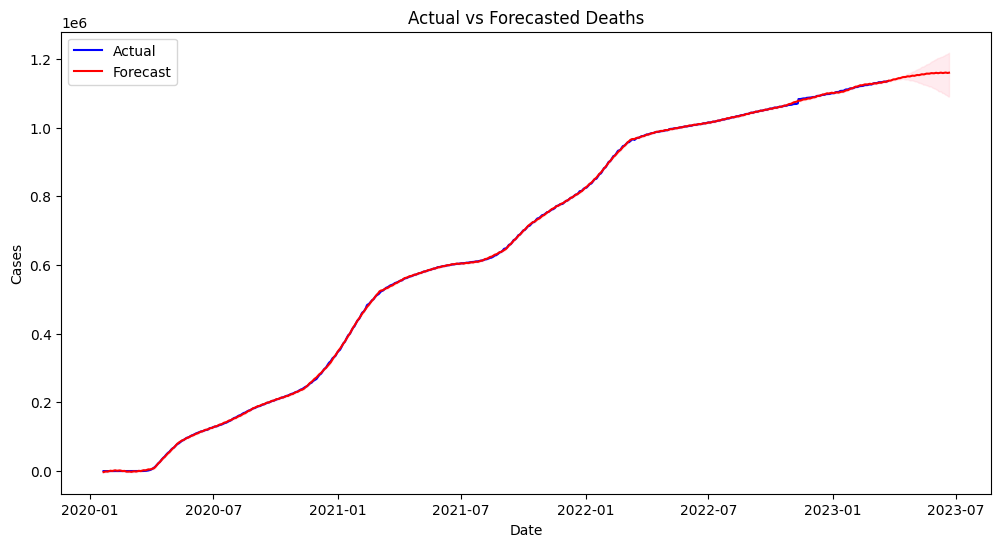

In [17]:
# Visualizing Forecasted Trends
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['deaths'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.title('Actual vs Forecasted Deaths')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [18]:
# Display the forecast table
print(forecast_table)

             ds         trend    yhat_lower    yhat_upper
0    2020-01-21 -5.416301e+03 -4.752938e+03 -1.096939e+03
1    2020-01-22 -5.544780e+03 -4.041459e+03 -3.799597e+02
2    2020-01-23 -5.673258e+03 -3.510415e+03  2.935670e+02
3    2020-01-24 -5.801736e+03 -2.900609e+03  7.912841e+02
4    2020-01-25 -5.930214e+03 -3.108782e+03  7.286402e+02
...         ...           ...           ...           ...
1243 2023-06-17  1.160675e+06  1.094986e+06  1.213079e+06
1244 2023-06-18  1.161052e+06  1.094158e+06  1.213805e+06
1245 2023-06-19  1.161430e+06  1.092064e+06  1.214791e+06
1246 2023-06-20  1.161807e+06  1.090723e+06  1.215733e+06
1247 2023-06-21  1.162184e+06  1.090432e+06  1.217932e+06

[1248 rows x 4 columns]


In [12]:
forecast_table.tail(30)

,ds,trend,yhat_lower,yhat_upper
1218,2023-05-23,1.151248e+06,1.121505e+06,1.184958e+06
1219,2023-05-24,1.151625e+06,1.120711e+06,1.186831e+06
1220,2023-05-25,1.152002e+06,1.120349e+06,1.186817e+06
1221,2023-05-26,1.152379e+06,1.120263e+06,1.189007e+06
1222,2023-05-27,1.152756e+06,1.117002e+06,1.190116e+06
1223,2023-05-28,1.153133e+06,1.116212e+06,1.189576e+06
1224,2023-05-29,1.153511e+06,1.115102e+06,1.189826e+06
1225,2023-05-30,1.153888e+06,1.113864e+06,1.191820e+06
1226,2023-05-31,1.154265e+06,1.113213e+06,1.193397e+06
1227,2023-06-01,1.154642e+06,1.112440e+06,1.195210e+06
